In [4]:
!pip install duckdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 25.6 MB/s eta 0:00:00a 0:00:01


In [5]:
import duckdb
import pandas as pd
import numpy as np

In [6]:
df_team = pd.read_csv("/Users/lancesanterre/so_predict/data/training/helper_data/cleaned_team_logs.csv")
df_game = pd.read_csv("/Users/lancesanterre/so_predict/data/training/helper_data/data_dirty.csv")
df_game.columns
df_game = df_game.drop(columns=["Unnamed: 0.1","Unnamed: 0"])

In [7]:
# Load CSVs
original_df = df_game     # has pitcher_name, pitcher_id
savant_df = pd.read_csv("/Users/lancesanterre/Baseball/pitching_predictions/player_data/starting_pitchers.csv")         # has pitcher_name and statcast data

# Register DataFrames as DuckDB tables
con = duckdb.connect()
con.register("original_pitchers", original_df)
con.register("savant_pitchers", savant_df)

df_game_added = con.execute("""
    SELECT o.*, s.handed
    FROM savant_pitchers s
    RIGHT JOIN original_pitchers o
    ON lower(trim(s.PlayerID)) = lower(trim(o.pitcherID))
""").df()
df_game_added

,Rk,Gcar,Gtm,Date,Team,Opp,Result,Inngs,Dec,DR,...,swing_miss_percent,arm_angle,attack_angle,attack_direction,swing_path_tilt,rate_ideal_attack_angle,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,pitcher_name,handed
0,1,35,2,2023-04-01,NYY,SFG,"L, 5-7",GS-4,None,99.0,...,25.4,35.3,8.299868,1.057708,31.964253,0.508642,36.568298,29.315653,Clarke Schmidt,R
1,2,36,7,2023-04-07,NYY,BAL,"L, 6-7",GS-4,None,5.0,...,25.4,35.3,8.299868,1.057708,31.964253,0.508642,36.568298,29.315653,Clarke Schmidt,R
2,3,37,12,2023-04-12,NYY,CLE,"W, 4-3",GS-5,None,4.0,...,25.4,35.3,8.299868,1.057708,31.964253,0.508642,36.568298,29.315653,Clarke Schmidt,R
3,4,38,17,2023-04-18,NYY,LAA,"L, 2-5",GS-4,L(0-1),5.0,...,25.4,35.3,8.299868,1.057708,31.964253,0.508642,36.568298,29.315653,Clarke Schmidt,R
4,5,39,22,2023-04-23,NYY,TOR,"L, 1-5",GS-6,L(0-2),4.0,...,25.4,35.3,8.299868,1.057708,31.964253,0.508642,36.568298,29.315653,Clarke Schmidt,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20729,19,176,140,2019-09-05,BOS,MIN,"L, 1-2",GS-5,None,5.0,...,26.6,33.5,10.318240,-2.073495,32.796440,0.456871,36.586341,31.162837,Nathan Eovaldi,R
20730,20,177,145,2019-09-10,BOS,TOR,"L, 3-4",GS-5,None,4.0,...,26.6,33.5,10.318240,-2.073495,32.796440,0.456871,36.586341,31.162837,Nathan Eovaldi,R
20731,21,178,150,2019-09-17,BOS,SFG,"L, 6-7 (15)",GS-4,None,6.0,...,26.6,33.5,10.318240,-2.073495,32.796440,0.456871,36.586341,31.162837,Nathan Eovaldi,R
20732,22,179,155,2019-09-22,BOS,TBR,"W, 7-4",GS-7,W(2-0),4.0,...,26.6,33.5,10.318240,-2.073495,32.796440,0.456871,36.586341,31.162837,Nathan Eovaldi,R


In [8]:
con = duckdb.connect()
con.register("original_pitchers", original_df)
con.register("savant_pitchers", savant_df)

df_game_added = con.execute("""
    SELECT o.*, s.handed
    FROM savant_pitchers s
    RIGHT JOIN original_pitchers o
    ON lower(trim(s.PlayerID)) = lower(trim(o.pitcherID))
""").df()
df_game_added

,Rk,Gcar,Gtm,Date,Team,Opp,Result,Inngs,Dec,DR,...,swing_miss_percent,arm_angle,attack_angle,attack_direction,swing_path_tilt,rate_ideal_attack_angle,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,pitcher_name,handed
0,1,35,2,2023-04-01,NYY,SFG,"L, 5-7",GS-4,None,99.0,...,25.4,35.3,8.299868,1.057708,31.964253,0.508642,36.568298,29.315653,Clarke Schmidt,R
1,2,36,7,2023-04-07,NYY,BAL,"L, 6-7",GS-4,None,5.0,...,25.4,35.3,8.299868,1.057708,31.964253,0.508642,36.568298,29.315653,Clarke Schmidt,R
2,3,37,12,2023-04-12,NYY,CLE,"W, 4-3",GS-5,None,4.0,...,25.4,35.3,8.299868,1.057708,31.964253,0.508642,36.568298,29.315653,Clarke Schmidt,R
3,4,38,17,2023-04-18,NYY,LAA,"L, 2-5",GS-4,L(0-1),5.0,...,25.4,35.3,8.299868,1.057708,31.964253,0.508642,36.568298,29.315653,Clarke Schmidt,R
4,5,39,22,2023-04-23,NYY,TOR,"L, 1-5",GS-6,L(0-2),4.0,...,25.4,35.3,8.299868,1.057708,31.964253,0.508642,36.568298,29.315653,Clarke Schmidt,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20729,19,176,140,2019-09-05,BOS,MIN,"L, 1-2",GS-5,None,5.0,...,26.6,33.5,10.318240,-2.073495,32.796440,0.456871,36.586341,31.162837,Nathan Eovaldi,R
20730,20,177,145,2019-09-10,BOS,TOR,"L, 3-4",GS-5,None,4.0,...,26.6,33.5,10.318240,-2.073495,32.796440,0.456871,36.586341,31.162837,Nathan Eovaldi,R
20731,21,178,150,2019-09-17,BOS,SFG,"L, 6-7 (15)",GS-4,None,6.0,...,26.6,33.5,10.318240,-2.073495,32.796440,0.456871,36.586341,31.162837,Nathan Eovaldi,R
20732,22,179,155,2019-09-22,BOS,TBR,"W, 7-4",GS-7,W(2-0),4.0,...,26.6,33.5,10.318240,-2.073495,32.796440,0.456871,36.586341,31.162837,Nathan Eovaldi,R


In [9]:
df_game_sorted = df_game_added.sort_values(by=['pitcherID', 'Date'])  # 'Date' must be a datetime column


In [10]:
df_game_sorted['Date'] = pd.to_datetime(df_game_sorted['Date'], errors='coerce')
df_game_sorted['Date'] = pd.to_datetime(df_game_sorted['Date'], errors='coerce')

# Extract year (which serves as 'season')
df_game_sorted['season'] = df_game_sorted['Date'].dt.year
df_game_sorted['season'] = df_game_sorted['Date'].dt.year
df_game_sorted

,Rk,Gcar,Gtm,Date,Team,Opp,Result,Inngs,Dec,DR,...,arm_angle,attack_angle,attack_direction,swing_path_tilt,rate_ideal_attack_angle,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,pitcher_name,handed,season
12910,1,1,60,2023-06-05,CIN,MIL,"W, 2-0",GS-6,W(1-0),99.0,...,46.0,8.504179,0.286331,31.105830,0.476234,38.313184,29.850951,Andrew Abbott,L,2023.0
12911,2,2,65,2023-06-10,CIN,STL,"W, 8-4",GS-6,W(2-0),4.0,...,46.0,8.504179,0.286331,31.105830,0.476234,38.313184,29.850951,Andrew Abbott,L,2023.0
12912,3,3,70,2023-06-16,CIN,HOU,"W, 2-1",GS-7,W(3-0),5.0,...,46.0,8.504179,0.286331,31.105830,0.476234,38.313184,29.850951,Andrew Abbott,L,2023.0
12913,4,4,75,2023-06-21,CIN,COL,"W, 5-3",GS-6,None,4.0,...,46.0,8.504179,0.286331,31.105830,0.476234,38.313184,29.850951,Andrew Abbott,L,2023.0
12914,5,5,80,2023-06-27,CIN,BAL,"W, 3-1",GS-7,W(4-0),5.0,...,46.0,8.504179,0.286331,31.105830,0.476234,38.313184,29.850951,Andrew Abbott,L,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13599,11,29,54,2025-05-26,LAD,CLE,"W, 7-2",GS-7,W(6-3),5.0,...,45.0,8.295022,-0.676920,33.928437,0.478469,36.392408,28.977229,Yoshinobu Yamamoto,R,2025.0
13600,12,30,59,2025-06-01,LAD,NYY,"L, 3-7",GS-4,L(6-4),5.0,...,45.0,8.295022,-0.676920,33.928437,0.478469,36.392408,28.977229,Yoshinobu Yamamoto,R,2025.0
13601,13,31,65,2025-06-07,LAD,STL,"L, 1-2",GS-7,None,5.0,...,45.0,8.295022,-0.676920,33.928437,0.478469,36.392408,28.977229,Yoshinobu Yamamoto,R,2025.0
13602,14,32,70,2025-06-13,LAD,SFG,"L, 2-6",GS-5,L(6-5),5.0,...,45.0,8.295022,-0.676920,33.928437,0.478469,36.392408,28.977229,Yoshinobu Yamamoto,R,2025.0


In [12]:
df_game_sorted['pitcherID']

12910    abbotan01
12911    abbotan01
12912    abbotan01
12913    abbotan01
12914    abbotan01
           ...    
13599    yamamyo01
13600    yamamyo01
13601    yamamyo01
13602    yamamyo01
13603    yamamyo01
Name: pitcherID, Length: 20734, dtype: object

In [13]:
df_game_sorted.to_csv("/Users/lancesanterre/so_predict/data/training/helper_data/game_data_clustering.csv")

In [14]:
cols = ["IP","H",'R', 'ER', 'HR', 'BB', 'IBB', 'SO','HBP', 'BK', 'WP', 'BF', 'ERA', 'FIP', 'Pit', 'Str', 'StL', 'StS', 'GB',
    'FB', 'LD', 'PU', 'Unk', 'GmSc', 'SB', 'CS', 'PO', 'AB', '2B', '3B',
    'GIDP', 'SF', 'ROE', 'aLI', 'WPA', 'acLI' ]
cols_drop = ["IP","H",'R', 'ER', 'HR', 'BB', 'IBB','HBP', 'BK', 'WP', 'BF', 'ERA', 'FIP', 'Pit', 'Str', 'StL', 'StS', 'GB',
    'FB', 'LD', 'PU', 'Unk', 'GmSc', 'SB', 'CS', 'PO', 'AB', '2B', '3B',
    'GIDP', 'SF', 'ROE', 'aLI', 'WPA', 'acLI',"Result","Rk","Gcar","cWPA","vest"]

In [15]:
grouped = df_game_sorted.groupby('pitcherID')

for col in cols:
    df_game_sorted[f'avg_{col}_5'] = grouped[col].shift(1).rolling(window=5).mean()

# Drop rows without enough prior games to calculate the rolling mean
df_game_sorted = df_game_sorted.dropna(subset=['avg_SO_5', 'avg_IP_5'])
df_game_sorted = df_game_sorted.drop(columns=[col for col in cols_drop])


In [16]:
team_name_map = {
    "TBR": "TB",
    "TBD": "TB",
    "KCR": "KC",
    "MON": "WSN",  # Montreal Expos → Nationals
    "FLA": "MIA",  # Florida Marlins → Miami Marlins
    "ATH": "OAK",  # Athletics legacy
}
df_game_sorted['Opp'] = df_game_sorted['Opp'].replace(team_name_map)
df_team['team_name'] = df_team['team_name'].replace(team_name_map)
df_game_sorted['handed'] = df_game_sorted['handed'].map({"L":1,"R":0})

In [17]:
df_team["PA"] = pd.to_numeric(df_team["PA"], errors='coerce')
df_team["SO"] = pd.to_numeric(df_team["SO"], errors='coerce')

# Calculate strikeouts per at-bat
df_team["OPP_SO_PRE"] = df_team["SO"] / df_team["PA"]

# Clean up any infinite or NaN values
df_team["OPP_SO_PRE"] = df_team["OPP_SO_PRE"].replace([np.inf, -np.inf], np.nan)
df_team["OPP_SO_PRE"] = df_team["OPP_SO_PRE"].fillna(0)
df_team.drop(columns='SO')

,Year,Lg,W,L,Finish,R/G,G,PA,AB,R,...,BA,OBP,SLG,OPS,E,DP,Fld%,BatAge,team_name,OPP_SO_PRE
0,2025,NLCentral,34,50,5.0,3.39,84,3115,2783,285,...,0.231,0.305,0.340,0.645,41,71.0,0.986,29.4,PIT,0.235955
1,2024,NLCentral,76,86,5.0,4.10,162,6086,5477,665,...,0.234,0.301,0.371,0.672,91,139.0,0.984,28.6,PIT,0.247453
2,2023,NLCentral,76,86,4.0,4.27,162,6089,5406,692,...,0.239,0.315,0.392,0.707,91,135.0,0.984,27.3,PIT,0.240434
3,2022,NLCentral,62,100,4.0,3.65,162,5912,5331,591,...,0.222,0.291,0.364,0.655,121,152.0,0.979,26.3,PIT,0.253214
4,2021,NLCentral,61,101,5.0,3.76,162,5983,5336,609,...,0.236,0.309,0.364,0.673,70,139.0,0.988,27.5,PIT,0.221962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,1997,NLEast,92,70,2.0,4.57,162,6300,5439,740,...,0.259,0.346,0.395,0.741,116,167.0,0.981,28.5,MIA,0.170476
2438,1996,NLEast,80,82,3.0,4.25,162,6194,5498,688,...,0.257,0.329,0.393,0.722,111,187.0,0.982,27.9,MIA,0.181143
2439,1995,NLEast,67,76,4.0,4.71,143,5569,4886,673,...,0.262,0.335,0.406,0.741,115,143.0,0.979,28.1,MIA,0.164482
2440,1994,NLEast,51,64,5.0,4.07,115,4387,3926,468,...,0.266,0.330,0.396,0.725,95,111.0,0.978,27.6,MIA,0.170048


In [18]:
con.register("hitters", df_team)
con.register("training_df", df_game_sorted)

df_team_game = con.execute("""
    SELECT s.*, o.*
    FROM training_df s
    JOIN hitters o
        ON lower(trim(s.OPP)) = lower(trim(o.team_name))
        AND s.season = o.Year
""").df()

In [274]:
df_team_game

,Gtm,Date,Team,Opp,Inngs,Dec,DR,SO,pitcherID,gmm_cluster,...,BA_1,OBP_1,SLG_1,OPS,E,DP,Fld%,BatAge,team_name,OPP_SO_PRE
0,84,2023-07-02,CIN,SDP,GS-8,None,4.0,12.0,abbotan01,0,...,0.244,0.329,0.413,0.742,73,130.0,0.988,28.4,SDP,0.212136
1,89,2023-07-07,CIN,MIL,GS-5,L(4-1),4.0,6.0,abbotan01,0,...,0.240,0.319,0.385,0.704,77,117.0,0.987,27.7,MIL,0.232084
2,93,2023-07-15,CIN,MIL,GS-6,L(4-2),7.0,3.0,abbotan01,0,...,0.240,0.319,0.385,0.704,77,117.0,0.987,27.7,MIL,0.232084
3,98,2023-07-20,CIN,SFG,GS-8,W(5-2),4.0,6.0,abbotan01,0,...,0.235,0.312,0.383,0.695,117,143.0,0.981,28.5,SFG,0.244791
4,103,2023-07-25,CIN,MIL,GS-7,W(6-2),4.0,9.0,abbotan01,0,...,0.240,0.319,0.385,0.704,77,117.0,0.987,27.7,MIL,0.232084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19576,54,2025-05-26,LAD,CLE,GS-7,W(6-3),5.0,7.0,yamamyo01,3,...,0.227,0.298,0.369,0.667,60,66.0,0.979,27.8,CLE,0.226287
19577,59,2025-06-01,LAD,NYY,GS-4,L(6-4),5.0,2.0,yamamyo01,3,...,0.252,0.334,0.444,0.779,38,50.0,0.987,28.4,NYY,0.230745
19578,65,2025-06-07,LAD,STL,GS-7,None,5.0,9.0,yamamyo01,3,...,0.254,0.325,0.397,0.721,32,61.0,0.990,27.1,STL,0.202627
19579,70,2025-06-13,LAD,SFG,GS-5,L(6-5),5.0,4.0,yamamyo01,3,...,0.231,0.311,0.372,0.684,45,59.0,0.985,28.7,SFG,0.224311


In [20]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


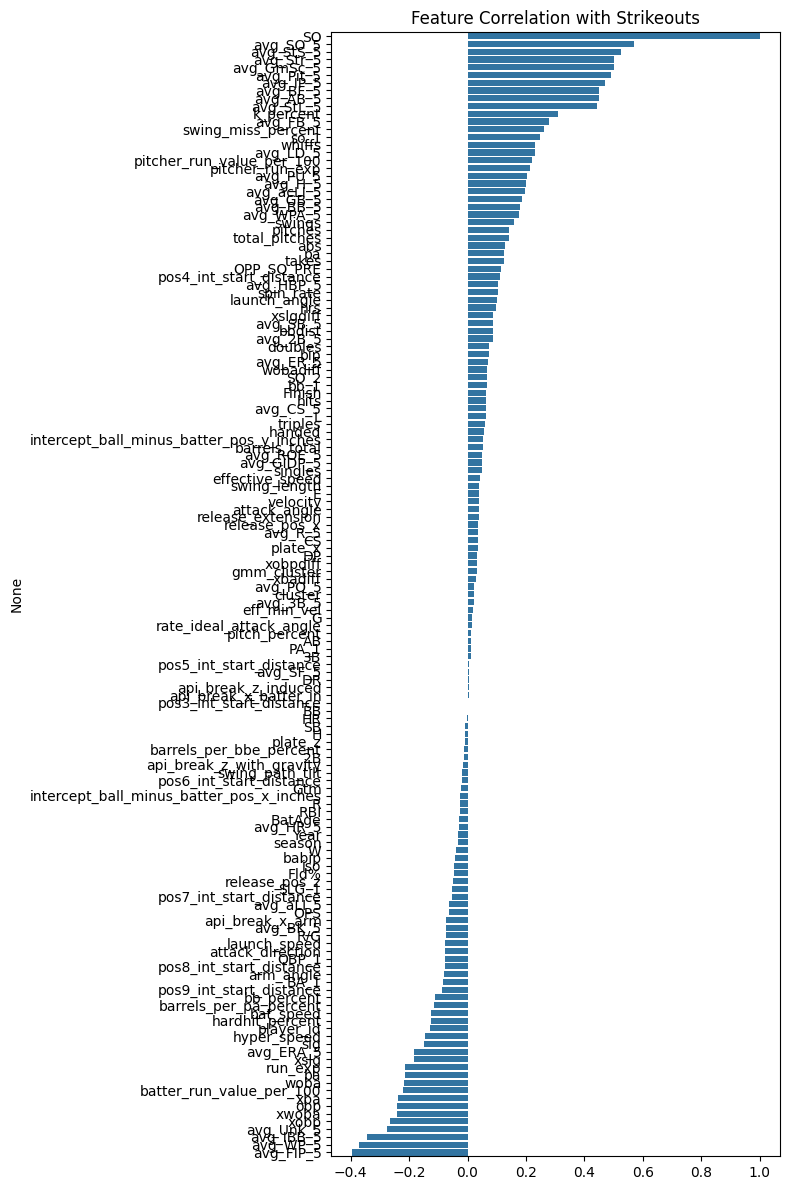

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

correlations = df_team_game.corr(numeric_only=True)['SO'].sort_values(ascending=False)

plt.figure(figsize=(8, 12))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Feature Correlation with Strikeouts')
plt.tight_layout()
plt.show()


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df_team_game.drop(columns=["2B","SB","H","HR","DR","BB","gmm_cluster","cluster","avg_SF_5","3B","AB","G","avg_3B_5","avg_PO_5"])
X = X.select_dtypes(include=['float64', 'int64'])
X = X.dropna()
y = X['SO']
X = X.drop(columns='SO')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

print(f"R² score: {model.score(X_test, y_test):.4f}")


R² score: 0.3917


In [23]:
df_team_game['pitcherID']

0        abbotan01
1        abbotan01
2        abbotan01
3        abbotan01
4        abbotan01
           ...    
19576    yamamyo01
19577    yamamyo01
19578    yamamyo01
19579    yamamyo01
19580    yamamyo01
Name: pitcherID, Length: 19581, dtype: object

In [51]:
df_team_game.to_csv("/Users/lancesanterre/so_predict/data/training/data_4_featureSelection/df_team_game.csv")

In [52]:
player_id = df_team_game['pitcherID']

In [53]:
# Align features and target cleanly
df = df_team_game.copy()

df = df.drop(columns=["2B","SB","H","HR","DR","BB","gmm_cluster","cluster","avg_SF_5","3B","AB","G","avg_3B_5","avg_PO_5"])
df = df.select_dtypes(include=['float64', 'int64'])  # Only numeric

df = df.dropna()

y = df['SO']
X = df.drop(columns='SO')




In [54]:
player_id

0        abbotan01
1        abbotan01
2        abbotan01
3        abbotan01
4        abbotan01
           ...    
19576    yamamyo01
19577    yamamyo01
19578    yamamyo01
19579    yamamyo01
19580    yamamyo01
Name: pitcherID, Length: 19581, dtype: object

In [55]:
X['player_id'] = player_id
X['player_id']

0        abbotan01
1        abbotan01
2        abbotan01
3        abbotan01
4        abbotan01
           ...    
19576    yamamyo01
19577    yamamyo01
19578    yamamyo01
19579    yamamyo01
19580    yamamyo01
Name: player_id, Length: 18958, dtype: object

In [56]:
X.to_csv("/Users/lancesanterre/so_predict/data/training/new_training/X_train.csv", index=False)
y.to_csv("/Users/lancesanterre/so_predict/data/training/new_training/y_train.csv", index=False)


In [7]:
import pandas as pd
import numpy as np

y = pd.read_csv("/Users/lancesanterre/so_predict/data/training/new_training/y_train.csv")
y["SO"].unique()

array([12.,  6.,  3.,  9.,  5.,  7.,  1.,  4.,  8.,  2., 10., 11.,  0.,
       14., 13., 16., 15., 17., 20.])

In [16]:
dictionary_y = {}
for val in y["SO"]:
    if val not in dictionary_y:
        dictionary_y[val] = 1
    else:
        dictionary_y[val] += 1
dictionary_y

{12.0: 214,
 6.0: 2438,
 3.0: 1954,
 9.0: 1035,
 5.0: 2624,
 7.0: 2037,
 1.0: 710,
 4.0: 2365,
 8.0: 1563,
 2.0: 1274,
 10.0: 669,
 11.0: 340,
 0.0: 1585,
 14.0: 44,
 13.0: 82,
 16.0: 5,
 15.0: 16,
 17.0: 2,
 20.0: 1}

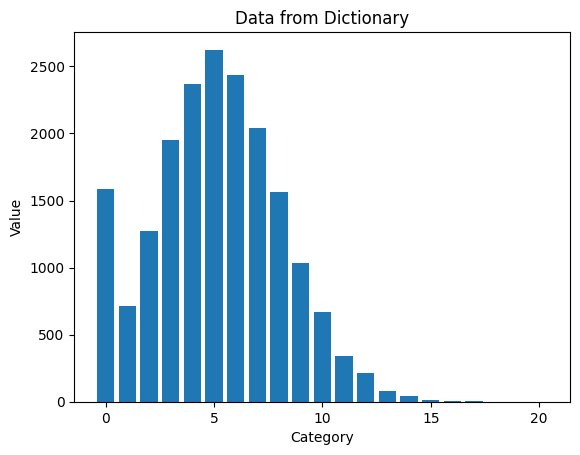

In [15]:
import matplotlib.pyplot as plt


# Extract keys and values
categories = list(dictionary_y.keys())
values = list(dictionary_y.values())

# Create a bar plot
plt.bar(categories, values)
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Data from Dictionary')
plt.show()

# Create a line plot (if keys represent a continuous sequence)
# plt.plot(categories, values)
# plt.xlabel('Category')
# plt.ylabel('Value')
# plt.title('Data from Dictionary (Line Plot)')
# plt.show()

In [21]:
def map_to_bin(target_value):
    """
    Maps a target value to one of 5 bins based on equal-frequency cutoffs.
    
    Args:
        target_value (float): The target value to bin.
        
    Returns:
        int: Bin label (0 to 4).
    """
    if target_value <= 5.0:
        return 0  
    elif target_value > 5.0:
        return 1 
# Example usage:
# Apply to a single value
value = 6.0
bin_label = map_to_bin(value)
print(f"Value {value} maps to bin {bin_label}")

# Apply to a list of values
values = y['SO']
bin_labels = [map_to_bin(v) for v in values]
print(f"Values {values} map to bins {bin_labels}")

Value 6.0 maps to bin 1
Values 0        12.0
1         6.0
2         3.0
3         6.0
4         9.0
         ... 
18953     7.0
18954     2.0
18955     9.0
18956     4.0
18957     5.0
Name: SO, Length: 18958, dtype: float64 map to bins [1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [22]:
bin_labels = pd.DataFrame(bin_labels)

In [23]:
bin_labels.to_csv("/Users/lancesanterre/so_predict/data/training/new_training/y_5_train.csv")